(256, 256)


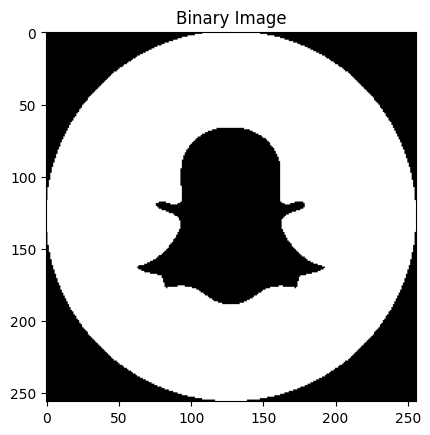

Optimal Block Size: (65, 85), Compression Ratio: 29.84, Relative Data Redundancy: 0.97

Generations Data:


,Generation,Best Fitness,Fitness_1,Fitness_2,Fitness_3,Fitness_4,Fitness_5,Fitness_6,Fitness_7,Fitness_8,Fitness_9,Fitness_10
0,1,24.453731,22.946779,11.855282,24.058737,22.882682,22.914685,22.614217,24.453731,11.233459,22.882682,22.629834
1,2,29.735027,22.978962,22.882682,22.978962,22.882682,22.898672,22.898672,24.417288,24.041086,29.735027,22.614217
2,3,29.952468,29.952468,22.723994,22.914685,22.946779,22.978962,22.898672,21.830779,22.946779,22.850767,24.490284
3,4,29.952468,29.952468,29.952468,22.397813,23.043601,23.043601,23.659206,22.882682,22.978962,24.380952,22.882682
4,5,29.952468,22.474623,23.043601,23.108604,29.843352,22.978962,22.978962,22.882682,29.952468,24.417288,22.850767
5,6,29.897810,24.417288,24.417288,22.946779,29.897810,29.897810,22.882682,24.490284,22.850767,22.914685,16.752556
6,7,29.952468,22.978962,29.952468,22.978962,29.843352,21.291748,23.043601,22.946779,21.291748,29.897810,29.897810
7,8,29.952468,29.897810,29.897810,29.843352,23.043601,24.526946,23.272727,29.897810,22.598621,29.952468,29.897810
8,9,29.952468,29.897810,29.897810,29.952468,29.952468,29.843352,23.523331,18.265329,28.272649,22.771369,28.272649
9,10,29.952468,23.865987,22.095752,11.586987,29.952468,29.897810,29.952468,29.952468,29.952468,29.952468,29.952468


In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import pandas as pd

# Load the image
image_path = 'binaryimage.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Convert to binary (0 or 1) image
_, binary_image = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY_INV)
print(binary_image.shape)

plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

def run_length_encode(block):
    flat_block = block.flatten()
    compressed_size = 0
    count = 1
    for i in range(1, len(flat_block)):
        if flat_block[i] == flat_block[i-1]:
            count += 1
        else:
            compressed_size += 2  # Value and count
            count = 1
    compressed_size += 2  # For the last run
    return compressed_size

def compute_compressed_size(image, p, q):
    compressed_size = 0
    for i in range(0, image.shape[0], p):
        for j in range(0, image.shape[1], q):
            block = image[i:i+p, j:j+q]
            compressed_block_size = run_length_encode(block)
            compressed_size += compressed_block_size
    return compressed_size

def compression_ratio(image, p, q):
    original_size = image.size  # Total number of bits in the image
    compressed_size = compute_compressed_size(image, p, q)
    return original_size / compressed_size

def initialize_population(size, max_block_dim):
    return [(random.randint(1, max_block_dim), random.randint(1, max_block_dim)) for _ in range(size)]

def selection(population, fitnesses, num_select):  #Stochastic universal sampling (SUS)
    # the higher the fitness score of an individual relative to others, the higher the probability of it being selected.
    selected_indices = np.random.choice(len(population), size=num_select, p=fitnesses/np.sum(fitnesses)) # p is probability ditribution
    return [population[i] for i in selected_indices]

def crossover(parent1, parent2):
    return (parent1[0], parent2[1]), (parent2[0], parent1[1])

def mutate(block, max_block_dim, mutation_rate=0.1):
    if random.random() < mutation_rate:
        return (random.randint(1, max_block_dim), random.randint(1, max_block_dim))
    return block

generations_data = []

def genetic_algorithm(image, max_block_dim, population_size=50, generations=100, mutation_rate=0.1):
    population = initialize_population(population_size, max_block_dim)
    for generation in range(generations):
     
        fitnesses = np.array([compression_ratio(image, p, q) for p, q in population])
  
        new_population = []
        for _ in range(population_size // 2):
            parents = selection(population, fitnesses, 2)
            offspring1, offspring2 = crossover(parents[0], parents[1])
            new_population.extend([mutate(offspring1, max_block_dim, mutation_rate), 
                                   mutate(offspring2, max_block_dim, mutation_rate)])
        population = new_population
        # Store generation data
        generation_data = {
            "Generation": generation + 1,
            "Best Fitness": max(fitnesses),  # Store best fitness of the generation
            **{f"Fitness_{i+1}": fitness for i, fitness in enumerate(fitnesses)}
        }
        generations_data.append(generation_data)
    best_block = max(population, key=lambda b: compression_ratio(image, b[0], b[1]))
    best_cr = compression_ratio(image, best_block[0], best_block[1])
    rd = 1 - (1 / best_cr)
    return best_block, best_cr, rd, pd.DataFrame(generations_data)

# Parameters
max_block_dim = 100
population_size = 10
generations = 50
mutation_rate = 0.1

# Run GA
best_block, best_cr, rd, generations_df= genetic_algorithm(binary_image, max_block_dim, population_size, generations, mutation_rate)
print(f"Optimal Block Size: {best_block}, Compression Ratio: {best_cr:.2f}, Relative Data Redundancy: {rd:.2f}")
# Print generations and best fitnesses dataframe
print("\nGenerations Data:")

generations_df


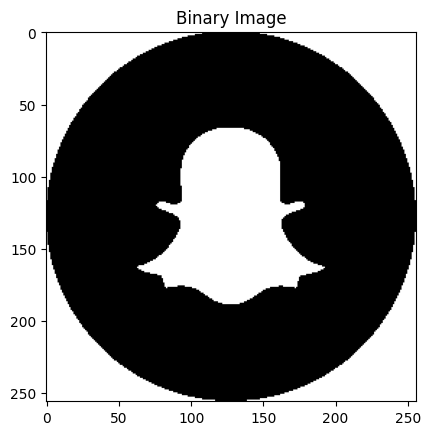

Optimal Block Size (p x q): (217, 14)
Compression Ratio (CR): 36.85939257592801
Relative Data Redundancy (RD): 0.972869873046875

Generations Data:


,Generation,Best Fitness,Parent1,Parent2,Parent3,Parent4,Parent5,Parent6,Parent7,Parent8,Parent9,Parent10
0,1,32.718922,28.163300,28.018811,32.188605,28.078835,32.188605,25.128834,21.933066,26.037346,28.668416,15.027746
1,2,33.798865,27.455383,21.881803,28.643357,27.947122,32.188605,25.332818,32.188605,28.731258,27.947122,28.382850
2,3,33.798865,21.772757,28.518712,28.309287,19.504762,22.382514,28.845070,33.048916,27.793045,28.481530,27.014015
3,4,33.798865,22.382514,22.771369,33.048916,22.382514,29.140062,22.692521,26.804090,23.215019,28.370563,26.804090
4,5,36.859393,29.748525,18.713878,22.382514,32.188605,29.681159,29.748525,26.804090,22.382514,28.845070,22.771369
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,36.859393,16.808412,29.789091,30.811472,16.761125,20.327543,30.869524,33.351654,30.811472,33.351654,30.898633
96,97,36.859393,21.984569,30.898633,30.898633,30.811472,33.351654,30.898633,33.351654,30.811472,33.351654,30.811472
97,98,36.859393,26.372636,30.898633,33.351654,30.898633,33.351654,30.811472,30.811472,30.898633,30.898633,30.898633
98,99,36.859393,30.811472,30.898633,30.898633,33.505112,29.283289,30.898633,27.318049,33.351654,20.308646,30.898633


In [36]:
import cv2
import numpy as np
import zlib
import random
import pandas as pd

# Load binary image
def load_binary_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
    plt.imshow(binary_image, cmap='gray')
    plt.title('Binary Image')
    plt.show()
    return binary_image

# Function to compress image with given block size
def compress_image(image, block_size):
    height, width = image.shape
    compressed_data = bytearray()

    # Compress image block by block
    for y in range(0, height, block_size[0]):
        for x in range(0, width, block_size[1]):
            block = image[y:y+block_size[0], x:x+block_size[1]]
            block_bytes = cv2.imencode('.png', block)[1].tobytes()
            compressed_block = zlib.compress(block_bytes)
            compressed_data.extend(compressed_block)

    return compressed_data

# Calculate compression ratio
def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

# Calculate relative data redundancy
def calculate_relative_data_redundancy(compression_ratio):
    return 1 - (1 / compression_ratio)

# Fitness function
def fitness_function(block_size, image):
    compressed_data = compress_image(image, block_size)
    original_size = image.size
    compressed_size = len(compressed_data)
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    return compression_ratio

# Selection function
def select_parents(population, fitness_scores, num_parents):
    parents = random.choices(population, weights=fitness_scores, k=num_parents)
    return parents

# Crossover function
def crossover(parent1, parent2):
    return (parent1[0], parent2[1]), (parent2[0], parent1[1])

# Mutation function
def mutate(block_size, max_height, max_width, mutation_rate):
    if random.random() < mutation_rate:
        return (random.randint(1, max_height), random.randint(1, max_width))
    return block_size

# Genetic algorithm
def genetic_algorithm(image, population_size, num_generations, mutation_rate):
    generations_data = []

    best_fitness = 0
    best_block_size = None

    # Generate initial population
    population = [(random.randint(1, image.shape[0]), random.randint(1, image.shape[1])) for _ in range(population_size)]

    for generation in range(num_generations):
        # Evaluate fitness for each individual
        fitness_scores = [fitness_function(block_size, image) for block_size in population]

        # Select parents based on fitness
        num_parents = population_size // 2
        parents = select_parents(population, fitness_scores, num_parents)

        # Store fitnesses of the parents
        parents_fitnesses = {f'Parent{i+1}': fitness_function(parent, image) for i, parent in enumerate(parents)}

        # Create next generation
        next_population = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(parents, 2)
            offspring1, offspring2 = crossover(parent1, parent2)
            next_population.extend([mutate(offspring1, image.shape[0], image.shape[1], mutation_rate), 
                                   mutate(offspring2, image.shape[0], image.shape[1], mutation_rate)])

        population = next_population

        # Find the best individual in the current generation
        max_fitness_index = np.argmax(fitness_scores)
        max_fitness = fitness_scores[max_fitness_index]
        if max_fitness > best_fitness:
            best_fitness = max_fitness
            best_block_size = population[max_fitness_index]

        # Store generation data
        generation_data = {
            "Generation": generation + 1,
            "Best Fitness": best_fitness,
            **parents_fitnesses  # Store fitnesses of the parents
        }
        generations_data.append(generation_data)

    # Convert generations data to dataframe
    generations_df = pd.DataFrame(generations_data)

    return best_block_size, best_fitness, generations_df

# Load binary image
binary_image = load_binary_image('binaryimage.jpg')

# Parameters
population_size = 20
num_generations = 100
mutation_rate = 0.2

# Run genetic algorithm
optimal_block_size, compression_ratio, generations_df = genetic_algorithm(binary_image, population_size, num_generations, mutation_rate)

# Calculate relative data redundancy
relative_data_redundancy = calculate_relative_data_redundancy(compression_ratio)

# Print results
print("Optimal Block Size (p x q):", optimal_block_size)
print("Compression Ratio (CR):", compression_ratio)
print("Relative Data Redundancy (RD):", relative_data_redundancy)

# Print generations and best fitnesses dataframe
print("\nGenerations Data:")
generations_df


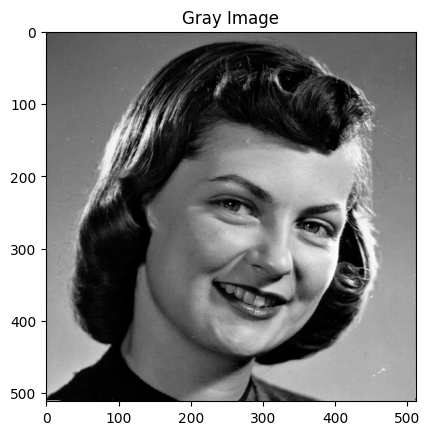

Optimal Block Size (p x q): (34, 111)
Compression Ratio (CR): 1.788597472776398
Relative Data Redundancy (RD): 0.4409027099609375

Generations Data:


,Generation,Best Fitness,Parent1,Parent2,Parent3,Parent4,Parent5,Parent6,Parent7,Parent8,Parent9,Parent10
0,1,32.718922,28.163300,28.018811,32.188605,28.078835,32.188605,25.128834,21.933066,26.037346,28.668416,15.027746
1,2,33.798865,27.455383,21.881803,28.643357,27.947122,32.188605,25.332818,32.188605,28.731258,27.947122,28.382850
2,3,33.798865,21.772757,28.518712,28.309287,19.504762,22.382514,28.845070,33.048916,27.793045,28.481530,27.014015
3,4,33.798865,22.382514,22.771369,33.048916,22.382514,29.140062,22.692521,26.804090,23.215019,28.370563,26.804090
4,5,36.859393,29.748525,18.713878,22.382514,32.188605,29.681159,29.748525,26.804090,22.382514,28.845070,22.771369
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,36.859393,16.808412,29.789091,30.811472,16.761125,20.327543,30.869524,33.351654,30.811472,33.351654,30.898633
96,97,36.859393,21.984569,30.898633,30.898633,30.811472,33.351654,30.898633,33.351654,30.811472,33.351654,30.811472
97,98,36.859393,26.372636,30.898633,33.351654,30.898633,33.351654,30.811472,30.811472,30.898633,30.898633,30.898633
98,99,36.859393,30.811472,30.898633,30.898633,33.505112,29.283289,30.898633,27.318049,33.351654,20.308646,30.898633


In [37]:
import cv2
import numpy as np
import zlib
import random
import pandas as pd

# Load grayscale image
def load_grayscale_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title('Gray Image')
    plt.show()
    return image

# Function to compress image with given block size
def compress_image(image, block_size):
    height, width = image.shape
    compressed_data = bytearray()

    # Compress image block by block
    for y in range(0, height, block_size[0]):
        for x in range(0, width, block_size[1]):
            block = image[y:y+block_size[0], x:x+block_size[1]]
            block_bytes = cv2.imencode('.png', block)[1].tobytes()
            compressed_block = zlib.compress(block_bytes)
            compressed_data.extend(compressed_block)

    return compressed_data

# Calculate compression ratio
def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

# Calculate relative data redundancy
def calculate_relative_data_redundancy(compression_ratio):
    return 1 - (1 / compression_ratio)

# Fitness function
def fitness_function(block_size, image):
    compressed_data = compress_image(image, block_size)
    original_size = image.size
    compressed_size = len(compressed_data)
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    return compression_ratio

# Selection function
def select_parents(population, fitness_scores, num_parents):
    parents = random.choices(population, weights=fitness_scores, k=num_parents)
    return parents

# Crossover function
def crossover(parent1, parent2):
    return (parent1[0], parent2[1]), (parent2[0], parent1[1])

# Mutation function
def mutate(block_size, max_height, max_width, mutation_rate):
    if random.random() < mutation_rate:
        return (random.randint(1, max_height), random.randint(1, max_width))
    return block_size

# Genetic algorithm
def genetic_algorithm(image, population_size, num_generations, mutation_rate):
    generations_data = []

    best_fitness = 0
    best_block_size = None

    # Generate initial population
    population = [(random.randint(1, image.shape[0]), random.randint(1, image.shape[1])) for _ in range(population_size)]

    for generation in range(num_generations):
        # Evaluate fitness for each individual
        fitness_scores = [fitness_function(block_size, image) for block_size in population]

        # Select parents based on fitness
        num_parents = population_size // 2
        parents = select_parents(population, fitness_scores, num_parents)

        # Store fitnesses of the parents
        parents_fitnesses = {f'Parent{i+1}': fitness_function(parent, image) for i, parent in enumerate(parents)}

        # Create next generation
        next_population = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(parents, 2)
            offspring1, offspring2 = crossover(parent1, parent2)
            next_population.extend([mutate(offspring1, image.shape[0], image.shape[1], mutation_rate), 
                                   mutate(offspring2, image.shape[0], image.shape[1], mutation_rate)])

        population = next_population

        # Find the best individual in the current generation
        max_fitness_index = np.argmax(fitness_scores)
        max_fitness = fitness_scores[max_fitness_index]
        if max_fitness > best_fitness:
            best_fitness = max_fitness
            best_block_size = population[max_fitness_index]

        # Store generation data
        generation_data = {
            "Generation": generation + 1,
            "Best Fitness": best_fitness,
            **parents_fitnesses  # Store fitnesses of the parents
        }
        generations_data.append(generation_data)

    # Convert generations data to dataframe
    generations_df = pd.DataFrame(generations_data)

    return best_block_size, best_fitness

# Load grayscale image
grayscale_image = load_grayscale_image('grayimage.jpg')

# Parameters
population_size = 20
num_generations = 100
mutation_rate = 0.2

# Run genetic algorithm
optimal_block_size, compression_ratio = genetic_algorithm(grayscale_image, population_size, num_generations, mutation_rate)

# Calculate relative data redundancy
relative_data_redundancy = calculate_relative_data_redundancy(compression_ratio)

# Print results
print("Optimal Block Size (p x q):", optimal_block_size)
print("Compression Ratio (CR):", compression_ratio)
print("Relative Data Redundancy (RD):", relative_data_redundancy)

print("\nGenerations Data:")
generations_df

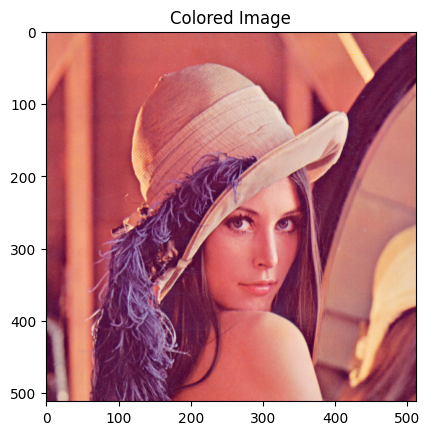

Optimal Block Size (p x q): (312, 141)
Compression Ratio (CR): 2.0268879039226184
Relative Data Redundancy (RD): 0.5066328048706055

Generations DataFrame:


,Generation,Best Fitness,Parent 1,Parent 2,Parent 3,Parent 4,Parent 5,Parent 6,Parent 7,Parent 8,Parent 9,Parent 10
0,1,2.019961,2.018056,2.010631,2.019911,2.012668,1.994173,1.975363,2.010002,2.009633,2.002601,1.999028
1,2,2.023079,1.991983,2.013743,1.337572,2.019183,2.013932,1.953485,1.953485,2.016966,1.982403,1.953485
2,3,2.023922,2.002509,1.892631,2.011707,2.002509,2.013375,2.014099,1.892631,2.002509,2.023922,2.012977
3,4,2.023922,2.008258,2.018049,1.991942,1.999333,1.999333,1.999333,2.019992,2.008258,1.991942,2.008258
4,5,2.023922,1.920399,1.134506,2.014737,1.870800,2.014133,2.011745,2.000973,2.014737,1.870800,1.953900
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2.026888,1.642128,1.953368,1.987449,1.953368,1.982065,1.990202,1.949588,2.010846,2.015717,2.016070
96,97,2.026888,1.842367,1.842367,1.831603,1.947314,2.003627,2.021044,2.003275,2.000633,1.993566,1.996527
97,98,2.026888,1.874727,1.951369,2.009159,1.872394,2.019374,1.874727,1.992014,2.010943,1.992014,1.559889
98,99,2.026888,1.957518,2.007570,1.603038,2.002486,1.999851,2.013515,2.018604,2.007570,1.976037,1.939602


In [38]:
import cv2
import numpy as np
import zlib
import random
import pandas as pd

# Load colored image
def load_colored_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.title('Colored Image')
    plt.show()
    return image

# Function to compress image with given block size
def compress_image(image, block_size):
    height, width, channels = image.shape
    compressed_data = bytearray()

    # Compress image block by block for each color channel
    for channel in range(channels):
        channel_data = image[:,:,channel]
        for y in range(0, height, block_size[0]):
            for x in range(0, width, block_size[1]):
                block = channel_data[y:y+block_size[0], x:x+block_size[1]]
                block_bytes = cv2.imencode('.png', block)[1].tobytes()
                compressed_block = zlib.compress(block_bytes)
                compressed_data.extend(compressed_block)

    return compressed_data

# Calculate compression ratio
def calculate_compression_ratio(original_size, compressed_size):
    return original_size / compressed_size

# Calculate relative data redundancy
def calculate_relative_data_redundancy(compression_ratio):
    return 1 - (1 / compression_ratio)

# Fitness function
def fitness_function(block_size, image):
    compressed_data = compress_image(image, block_size)
    original_size = image.size
    compressed_size = len(compressed_data)
    compression_ratio = calculate_compression_ratio(original_size, compressed_size)
    return compression_ratio

# Selection function
def select_parents(population, fitness_scores, num_parents):
    parents = random.choices(population, weights=fitness_scores, k=num_parents)
    return parents

# Crossover function
def crossover(parent1, parent2):
    return (parent1[0], parent2[1]), (parent2[0], parent1[1])

# Mutation function
def mutate(block_size, max_height, max_width, mutation_rate):
    if random.random() < mutation_rate:
        return (random.randint(1, max_height), random.randint(1, max_width))
    return block_size

# Genetic algorithm
def genetic_algorithm(image, population_size, num_generations, mutation_rate):
    best_fitness = 0
    best_block_size = None

    generations_data = []

    for generation in range(num_generations):
        # Generate random population
        population = [(random.randint(1, image.shape[0]), random.randint(1, image.shape[1])) for _ in range(population_size)]

        # Evaluate fitness for each individual
        fitness_scores = [fitness_function(block_size, image) for block_size in population]

        # Select parents based on fitness
        num_parents = population_size // 2
        parents = select_parents(population, fitness_scores, num_parents)

        # Store fitnesses of the parents
        parents_fitnesses = {f'Parent {i+1}': fitness_function(parent, image) for i, parent in enumerate(parents)}

        # Create next generation
        next_population = []
        for _ in range(population_size):
            parent1, parent2 = random.sample(parents, 2)
            offspring1, offspring2 = crossover(parent1, parent2)
            next_population.extend([mutate(offspring1, image.shape[0], image.shape[1], mutation_rate), 
                                   mutate(offspring2, image.shape[0], image.shape[1], mutation_rate)])

        population = next_population

        # Find the best individual in the current generation
        max_fitness_index = np.argmax(fitness_scores)
        max_fitness = fitness_scores[max_fitness_index]
        if max_fitness > best_fitness:
            best_fitness = max_fitness
            best_block_size = population[max_fitness_index]

        # Store generation data
        generation_data = {
            "Generation": generation + 1,
            "Best Fitness": best_fitness,
            **parents_fitnesses  # Store fitnesses of the parents
        }
        generations_data.append(generation_data)

    # Convert generations data to DataFrame
    generations_df = pd.DataFrame(generations_data)

    return best_block_size, best_fitness, generations_df

# Load colored image
colored_image = load_colored_image('coloredimage.png')

# Parameters
population_size = 20
num_generations = 100
mutation_rate = 0.2

# Run genetic algorithm
optimal_block_size, compression_ratio, generations_df = genetic_algorithm(colored_image, population_size, num_generations, mutation_rate)

# Calculate relative data redundancy
relative_data_redundancy = calculate_relative_data_redundancy(compression_ratio)

# Print results
print("Optimal Block Size (p x q):", optimal_block_size)
print("Compression Ratio (CR):", compression_ratio)
print("Relative Data Redundancy (RD):", relative_data_redundancy)

# Print generations DataFrame
print("\nGenerations DataFrame:")
generations_df
